In [65]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [21]:
#read dataset and convert into dataframe

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [22]:
data.isna().sum() # there are no null values 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

We can drop of the columns which does not show relevant relation with happiness score like Country Name: This column typically doesn't directly contribute to predicting the Happiness Score.

Region: While interesting for analysis and context, it might not directly influence the Happiness Score.

Happiness Rank: This is essentially an ordinal representation of the Happiness Score, so it's highly correlated with the target variable. Including both Rank and Score might lead to multicollinearity, which can be problematic for some models.

Standard Error: This represents the standard error of the happiness score. Unless you're interested in uncertainty, you might drop this.

Dystopia Residual: This is a calculated score which represents a country's unhappiness. If you're primarily interested in happiness, you might drop this

In [24]:
#dropping unnecessary feature

data.drop(['Country'],axis=1,inplace=True)
data.drop(['Region'],axis=1,inplace=True)
data.drop(['Happiness Rank'],axis=1,inplace=True)
data.drop(['Standard Error'],axis=1,inplace=True)
data.drop(['Dystopia Residual'],axis=1,inplace=True)

In [25]:
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [26]:
data.duplicated().sum()

0

In [27]:
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


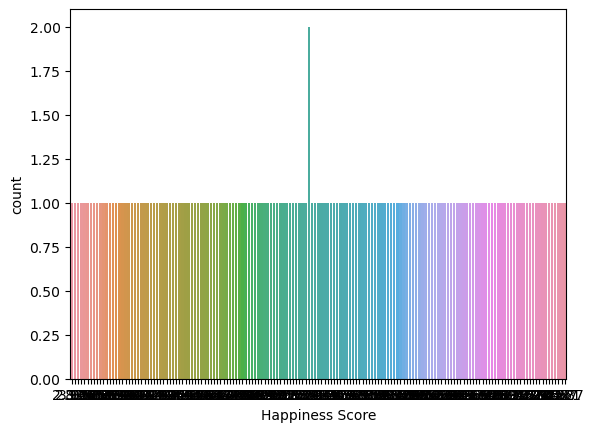

In [28]:
sns.countplot(x='Happiness Score',data=data)
plt.show()

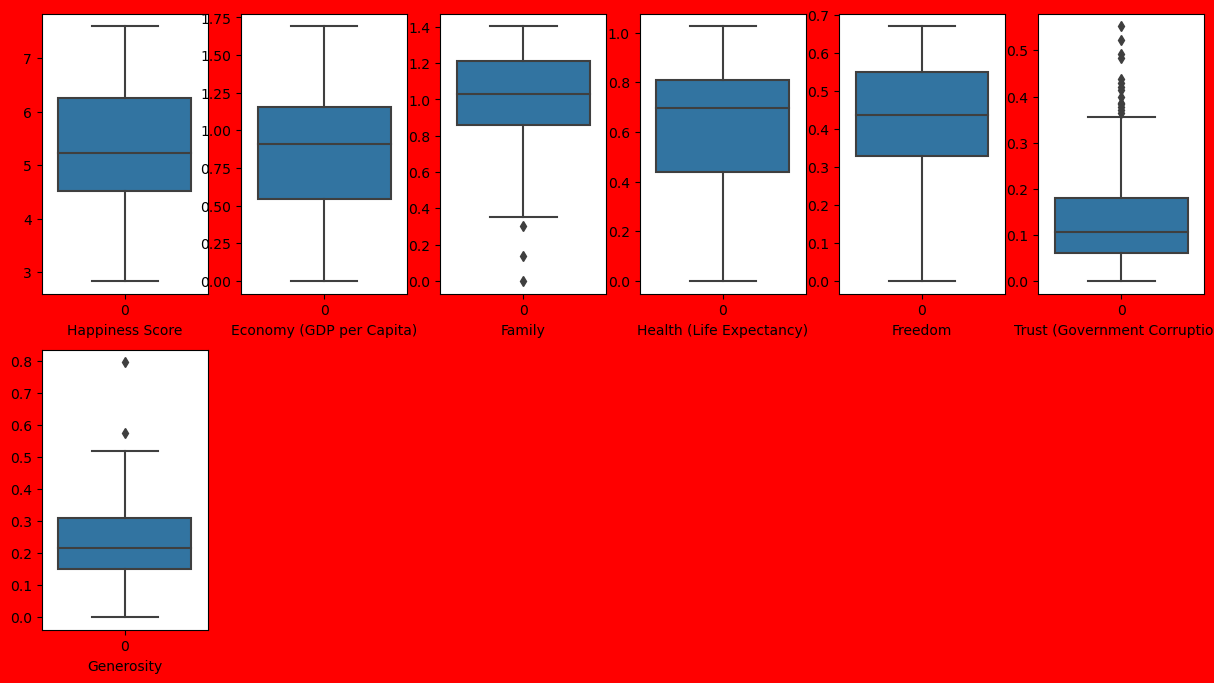

In [29]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax = plt.subplot(2,6,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

we can see there are outliers present in geneosity family and trust 

In [30]:
data.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

In [31]:

data['Trust (Government Corruption)']=np.cbrt(data['Trust (Government Corruption)'])
data['Generosity']=np.cbrt(data['Generosity'])


we have removed the skewness using cube root method

In [32]:
data.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
dtype: float64

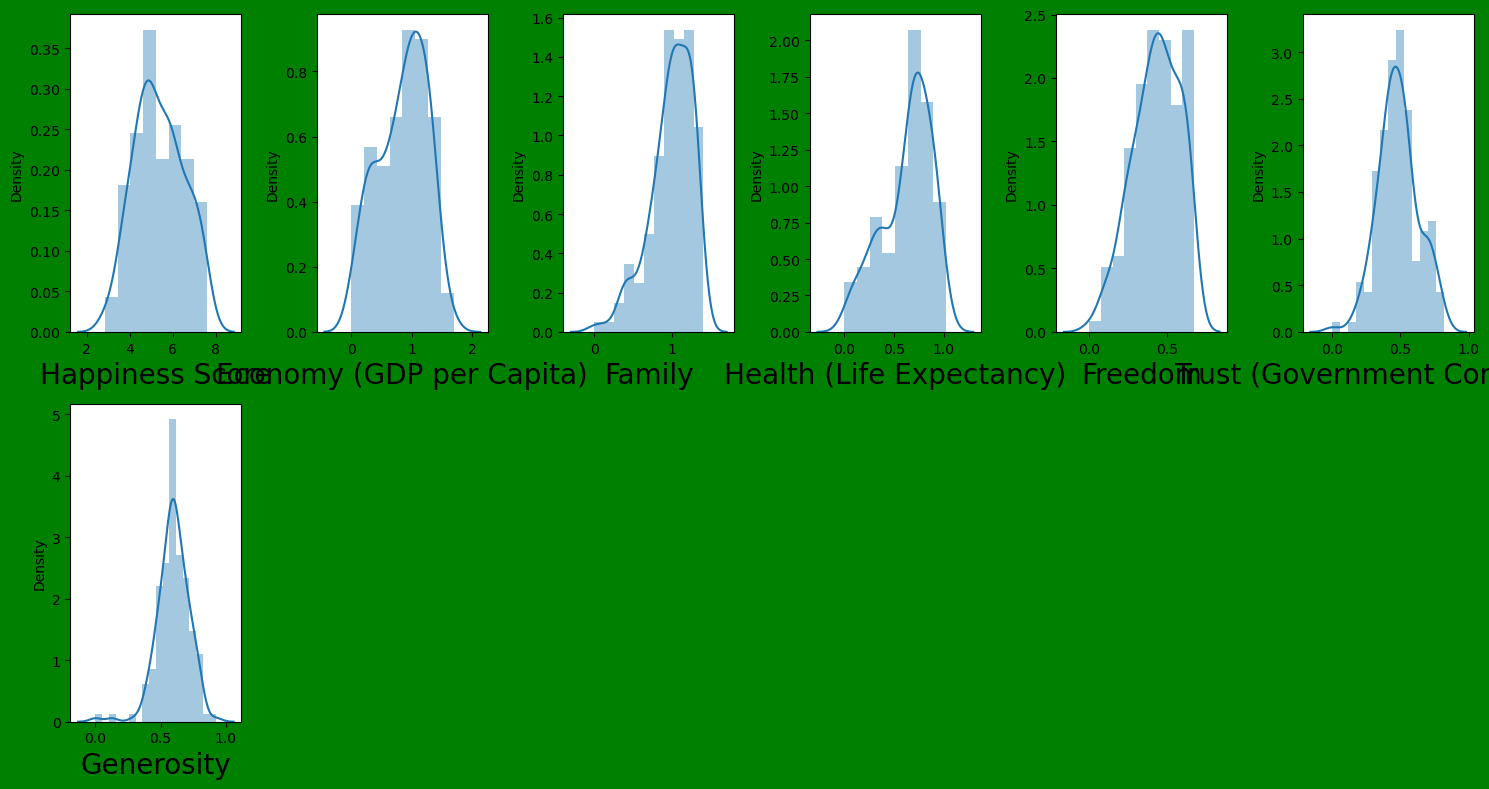

In [33]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [34]:
#checking for the correlation amongst all
cor = data.corr()
cor

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210
Trust (Government Corruption),0.326229,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991
Generosity,0.159029,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000


We can clearly see that it is positively correlated

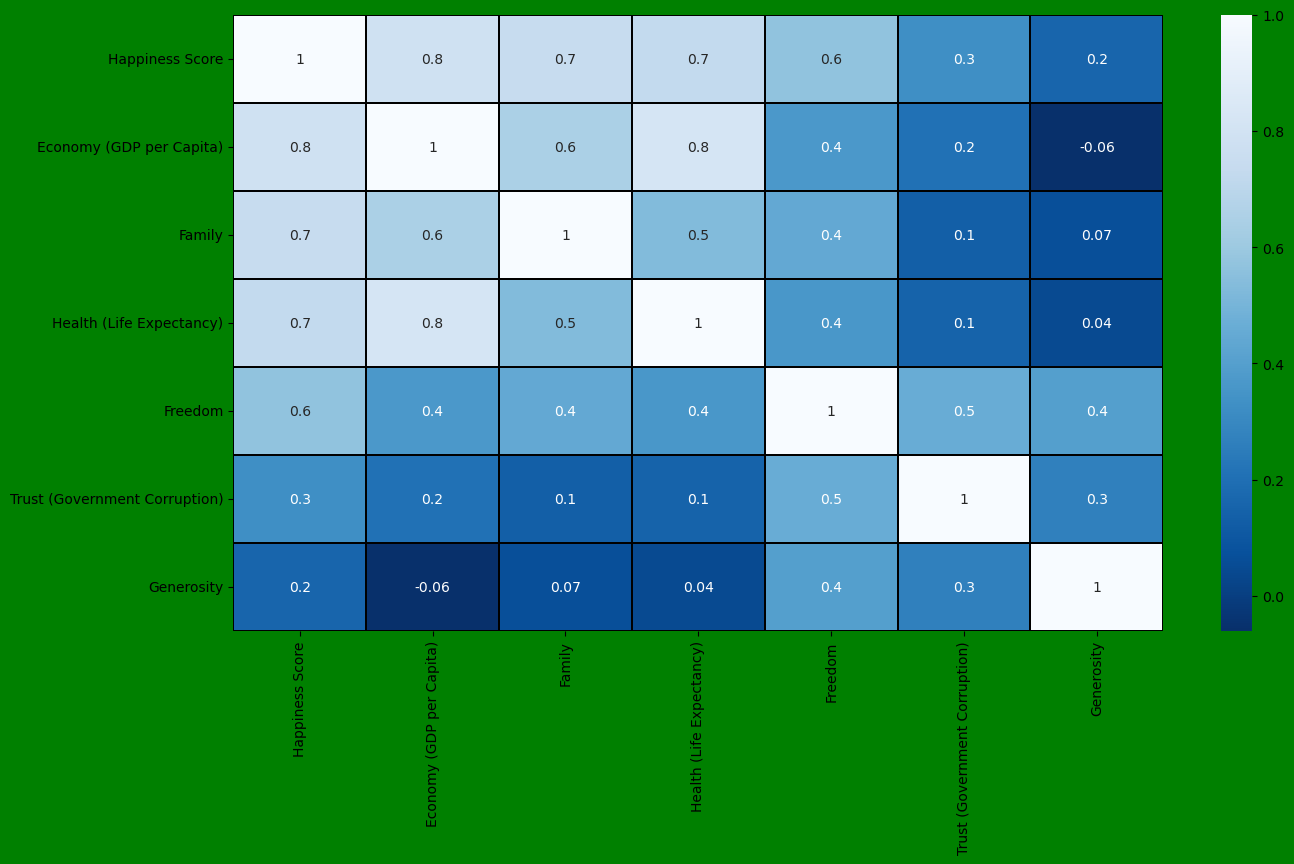

In [35]:
#plotting heatmap to check multicollinearity
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [38]:
x = data.drop('Happiness Score', axis=1)
y = data['Happiness Score']

In [41]:
scalar = StandardScaler()
x_scalar = pd.DataFrame(scalar.fit_transform(x), columns = x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029
1,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453
2,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903
3,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704
4,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371
154,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327
155,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484
156,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130


We are able to tackle the issue of biasness through standard scalar method

In [42]:
y.value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

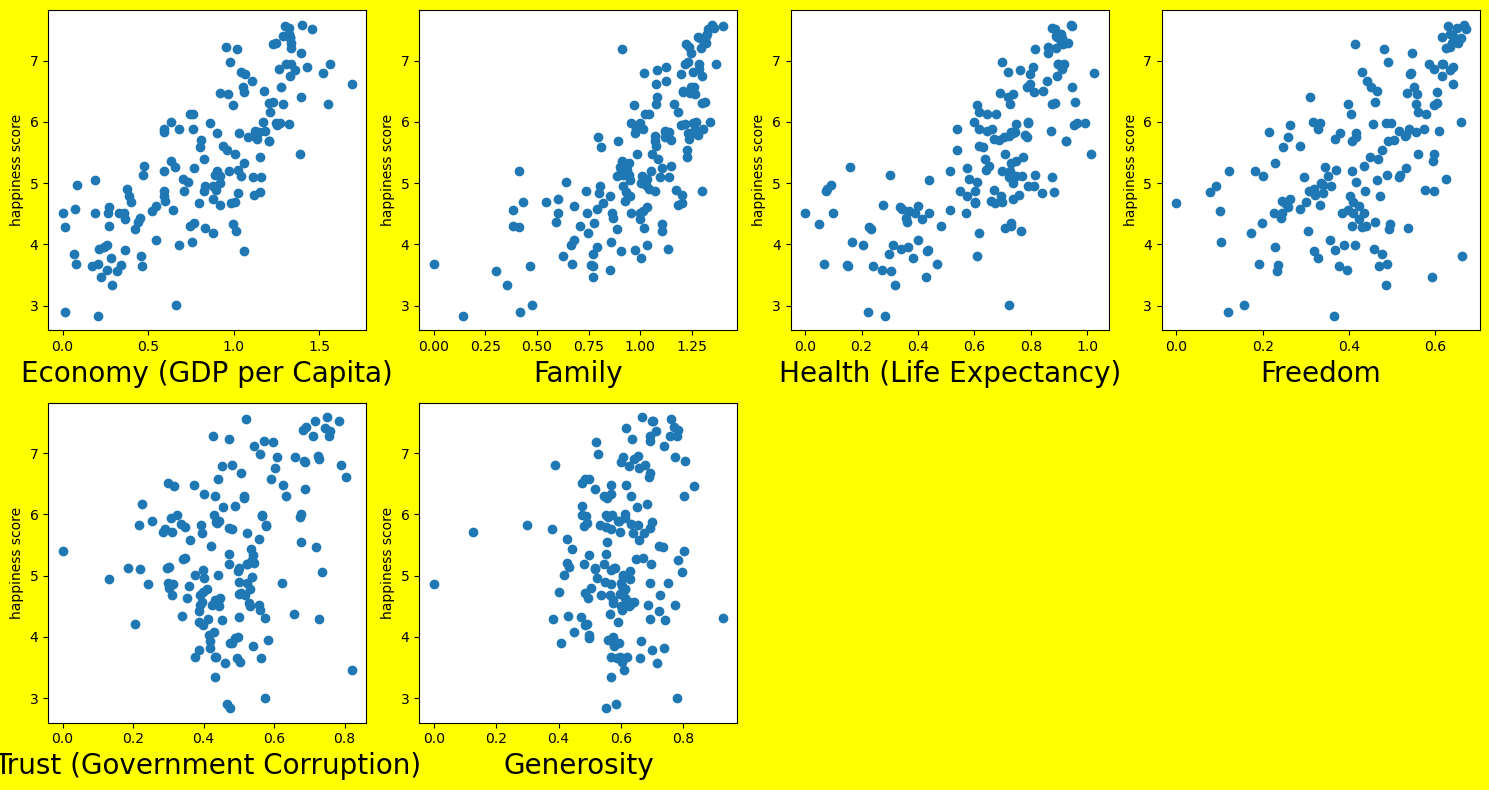

In [46]:
plt.figure(figsize=(15,8), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('happiness score', fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

here all the features show positive correlation with happiness score

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 100)

In [48]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [50]:
y_train.head()

6     7.378
25    6.750
21    6.853
75    5.332
84    5.129
Name: Happiness Score, dtype: float64

In [51]:
regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [53]:
data.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
156,2.905,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130
157,2.839,0.20868,0.13995,0.28443,0.36453,0.475204,0.550479


In [58]:
#check the accuracy score of different model

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'Accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
    
    elif train==False:
        pred = clf.predict(x_test) #
        print(f'Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [61]:
random_clf = RandomForestRegressor()
random_clf.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
knn = KNeighborsRegressor()

#model training
knn.fit(x_train, y_train)


KNeighborsRegressor()

In [54]:
import joblib
joblib.dump(regression, 'Happiness_score.pkl')

['Happiness_score.pkl']

In [55]:
RFC = joblib.load('Happiness_score.pkl')

prediction = regression.predict(x_test)
prediction

array([6.58660489, 6.29461013, 4.65597122, 5.98076116, 7.04979696,
       4.33617277, 5.35561019, 7.00173063, 5.29636435, 4.83618907,
       6.37650301, 5.23352602, 6.08829829, 6.0041759 , 5.90220841,
       5.60038961, 5.30422748, 5.94098142, 6.16391432, 3.70882817,
       6.43324332, 5.85423439, 5.20111519, 2.82186653, 5.87042907,
       3.1964927 , 4.10130115, 6.87697354, 6.6476449 , 4.37658958,
       4.34498359, 4.05769782, 5.05887769, 4.64743192, 6.84667136,
       7.08130375, 5.84221864, 4.51049124, 4.24735943, 4.1255953 ,
       4.81491154, 4.57855609, 3.72179187, 4.73496028, 5.61840207,
       5.03169272, 5.16521765, 6.08316528])

In [56]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data

,Predicted,Actual
0,6.586605,5.987
1,6.294610,7.226
2,4.655971,4.419
3,5.980761,6.983
4,7.049797,7.364
5,4.336173,4.633
6,5.355610,5.007
7,7.001731,7.561
8,5.296364,4.839
9,4.836189,5.889
